Notebook to experiment with scaling the number of spatial nodes.

Motivation: EigenMarkov diffusion worked with 10 nodes, but there was a mismatch upon scaling to 100 spatial locations.

### INIT

In [1]:
import sys

sys.path.append("../src/")

# Models
def get_ca_init_loc():
    # VDCC
    vdcc_loc = 2.35  # um

    return vdcc_loc


def get_ca_init_idx(n_space_pts):
    vdcc_loc = get_ca_init_loc()

    z = 4  # um
    dx = z / n_space_pts

    return int(vdcc_loc / dx)
import models.FiniteDiffRxnDiffusion as fdrd
import models.SpectralRxnDiffusion as srd
from utils.RunMultiruns import *
from utils.PlotMultiruns import PlotMultiRuns

In [2]:
# PLOTTING
binomial_sampling = False  # use binomial sampling for eme markov simulation
print_eigenvalues_and_vectors = False
print_eigenmode_init_conditions = False
print_eigenmode_transition_probability = False
print_eigenmodes_to_spatial_nodes = False
plot_eigenmodes = False
plot_eigenvectors = False
plot_eigenmode_init_conditions = False
plot_eigenmode_markov_simulation = False

### Parameters

In [3]:
# PARAMETERS
n_particles = 50  # number of molecules
n_space_pts = 101  # number of grid points along 1D line
n_time_pts = 100  # number of time points
ca_init_idx = get_ca_init_idx(n_space_pts)  # impulse site
n_eigenmodes = 101  # NOTE: only used in SpectralRxnDiffusion
n_runs = 10  # number of runs for multirun simulations (stochastic)

### FINITE DIFFERENCE

In [4]:
# FINITE DIFFERENCE
# DETERMINISTIC AND NODAL
# NOTE: FD has internal number of particles == 5275
fd = fdrd.FiniteDiffRxnDiffusion(
    n_spatial_locs=n_space_pts, n_time_pts=n_time_pts, impulse_idx=ca_init_idx
)


# fd.simulate_diffusion()
# fd.plot_diffusion([0, 1, 5, 20, 40, 50, 99])

### SPECTRAL

In [5]:
# SPECTRAL
# DETERMINISTIC AND MODAL
# NOTE: SRD has internal number of particles == 5275

sd = srd.SpectralRxnDiffusion(
    n_spatial_locs=n_space_pts,
    n_time_pts=n_time_pts,
    impulse_idx=ca_init_idx,
    n_eigenmodes=n_eigenmodes,
)

# sd.simulate_diffusion()
# sd.plot_diffusion([0, 1, 5, 20, 40, 50, 99])

### RANDOM WALK

In [6]:
from utils.RunMultiruns import EMERunMultiruns

eme = EMERunMultiruns(
    n_runs=n_runs,
    n_particles=n_particles,
    n_spatial_locs=n_space_pts,
    n_time_pts=n_time_pts,
    particle_start_loc=ca_init_idx
)

eme.run_multi(make_dir=True)

Made new directory: ../data/eme-validation/markov-eme/20240303_153641/
RUNNING SIMULATION 0


n_runs: 10
start_loc: 0
n_particles: -0.048727958106796546
Preparing to plot simulation data...
[[-0.00097456 -0.00202147 -0.00023507 ...  0.00308864  0.00707272
   0.00258031]
 [-0.00049275 -0.00405533 -0.00768688 ...  0.00572681  0.00354082
   0.00698348]
 [-0.00081148  0.00667469  0.00863139 ... -0.00696752 -0.0074138
  -0.00240995]
 ...
 [-0.00161693 -0.00886963 -0.00470078 ... -0.0084511  -0.01142035
  -0.00744365]
 [-0.00137023  0.00755321  0.00268012 ...  0.00236628  0.00874872
  -0.00187557]
 [-0.00004321 -0.00485728 -0.00331611 ...  0.0033112  -0.00022909
   0.00613752]]
Plotting simulation data...
Beautifying plot...


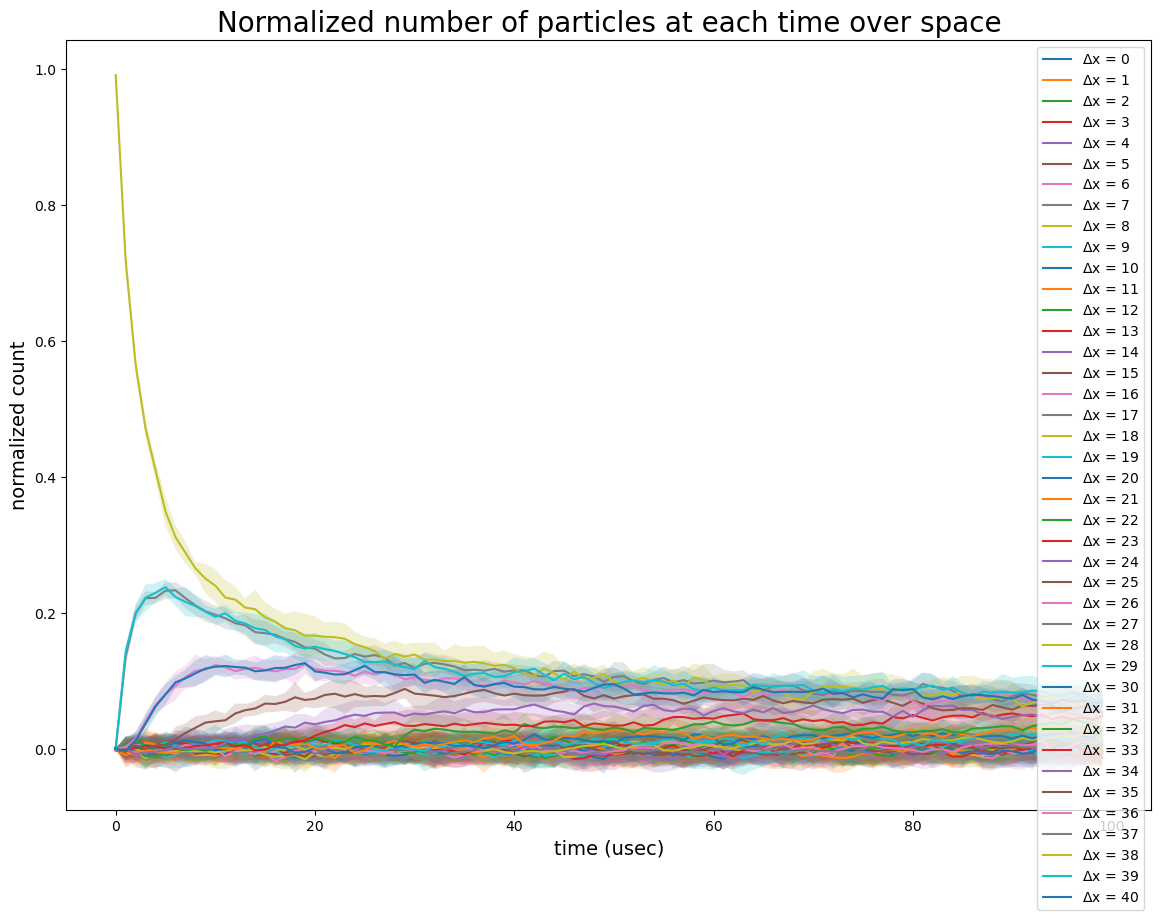

In [7]:
import utils.PlotMultiruns as pm

EME_RUN = "20240303_152815"
plotter = pm.PlotMultiRuns(
    dir=f"../data/eme-validation/markov-eme/{EME_RUN}/",
    file_id="eme",
    eme_particles=n_particles
)

# plotter.plot_multiruns()
# TODO: debug multirun plot for EME -- giving impulse at boundary
# plotter.plot_multiruns_time([0, 99, 99])
plotter.plot_multiruns_space()